# Modeling Exercises
Do your work for this exercise in a notebook named ```modeling``` within your ```clustering-exercises``` repository.

In [1]:
# Imports Needed:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# Cluster
from sklearn.cluster import KMeans

import wrangle_zillow as wz
import wrangle_mall as wm

<div class="alert alert-warning">


### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the ```iris``` dataset.

In [2]:
# Read in iris dataset
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Split
train, validate, test = wz.split(df, stratify=False, target=None)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (150, 5)

      Train: (90, 5) - 60.0%
   Validate: (30, 5) - 20.0%
       Test: (30, 5) - 20.0%


# a. Choose features other than the ones used in the lesson.  

In [4]:
# Xy_Split
feature_cols = ['petal_length', 'sepal_length']
target = ['species']

X_train, y_train, X_validate, y_validate, X_test, y_test = wz.Xy_split(feature_cols, target, train, validate, test)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:


   X_train: (90, 2)   Index(['petal_length', 'sepal_length'], dtype='object')
   y_train: (90, 1)     Index(['species'])

X_validate: (30, 2)   Index(['petal_length', 'sepal_length'], dtype='object')
y_validate: (30, 1)     Index(['species'])

    X_test: (30, 2)   Index(['petal_length', 'sepal_length'], dtype='object')
    y_test: (30, 1)     Index(['species'])


In [5]:
# Create, Fit, Run KMeans on X_train

# Create it
kmeans = KMeans(n_clusters=3)

# Fit it
kmeans.fit(X_train)

# Run it
kmeans.predict(X_train)

array([1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1,
       1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 2], dtype=int32)

In [6]:
# Create a new column in the dataframe of my predictions
train['cluster'] = kmeans.predict(X_train)

# b. Visualize the results of your clustering.  

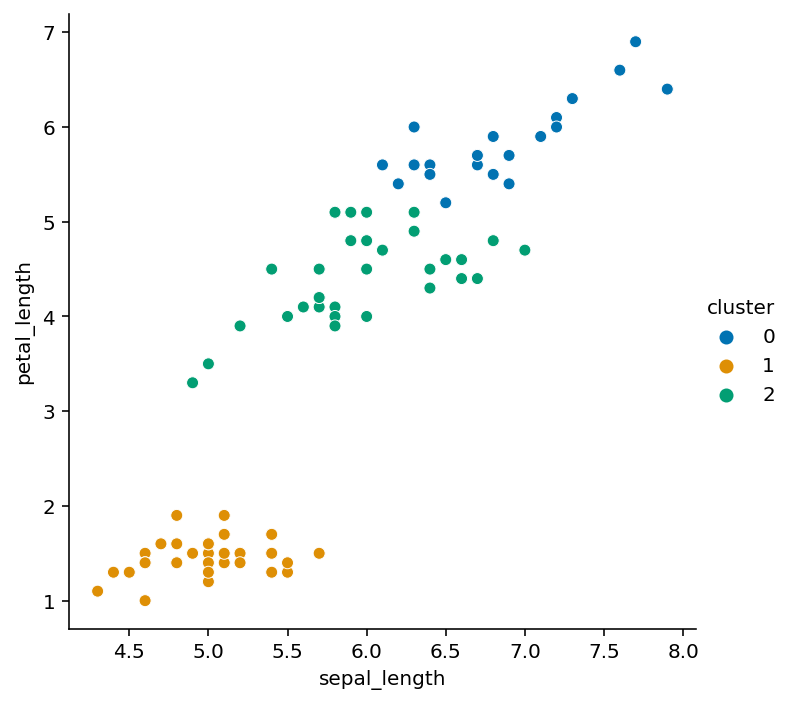

In [7]:
# Plot predictions
sns.relplot(x='sepal_length', y='petal_length', hue='cluster',
            palette='colorblind', data=train)

In [8]:
# Fill a list with inertia values for increasing number of clusters
inertia_list = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    
inertia_list  

[61.831086180520145,
 28.949991341991343,
 20.38368049155146,
 14.303401002506268,
 11.613398005503269,
 9.325373376623377]

# c. Use the elbow method to visually select a good value for k.  

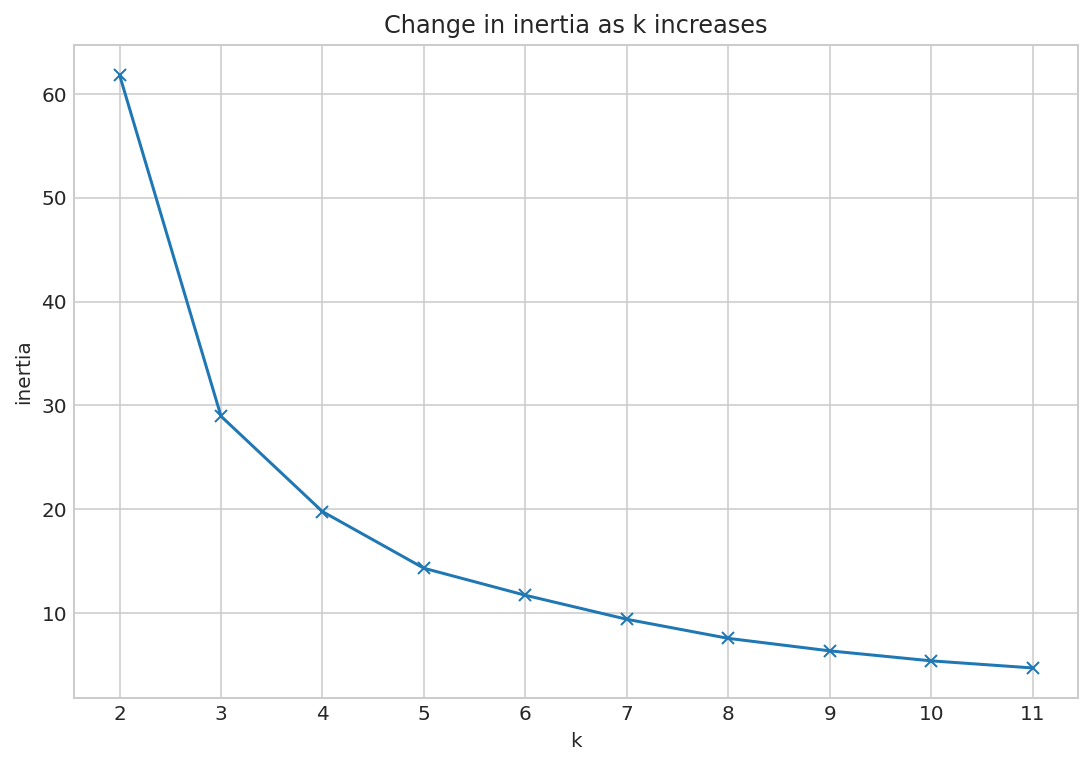

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# d. Repeat the clustering, this time with 3 different features.  

In [10]:
#Create a new X subset with 3 features
X2_train = train[['sepal_length', 'petal_length', 'petal_width']]

In [11]:
#Fit a KMeans model to my 3 feature dataset
kmeans2 = KMeans(n_clusters=4)

kmeans2.fit(X2_train)

kmeans2.predict(X2_train)

array([0, 0, 0, 0, 3, 1, 2, 1, 2, 1, 3, 0, 1, 0, 1, 1, 1, 3, 1, 2, 3, 2,
       1, 3, 3, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 3, 2, 1, 3, 0, 0, 1, 2, 0, 3, 3, 1, 3, 1, 0, 1, 2, 1,
       2, 1, 0, 3, 1, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1,
       3, 1], dtype=int32)

In [12]:
#Store my predictions in the dataframe
train['cluster_3f'] = kmeans2.predict(X2_train)

# Visualize the results of your clustering.  

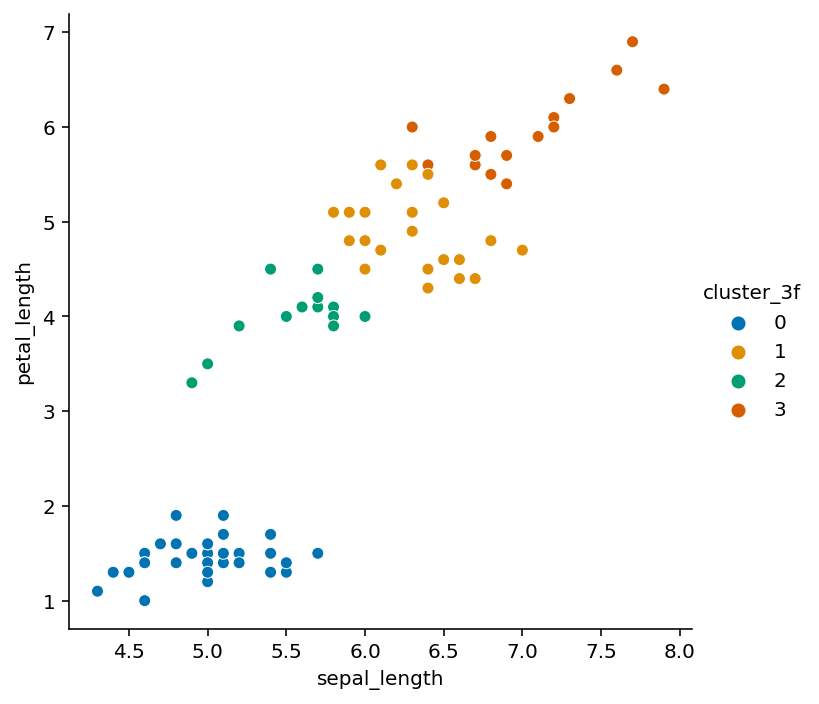

In [13]:
#Visualize my results
sns.relplot(x='sepal_length', y='petal_length', hue='cluster_3f',
            palette='colorblind', data=train)

In [14]:
#Create a list of inertias for models fit to my 3 features
inertia_list_3f = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X2_train)
    inertia_list_3f.append(kmeans.inertia_)
    
inertia_list_3f    

[73.29251402345743,
 33.95494805194806,
 23.765391456582634,
 17.944646825396827,
 15.20390764790765,
 12.466349374309903]

# Use the elbow method to visually select a good value for k.  

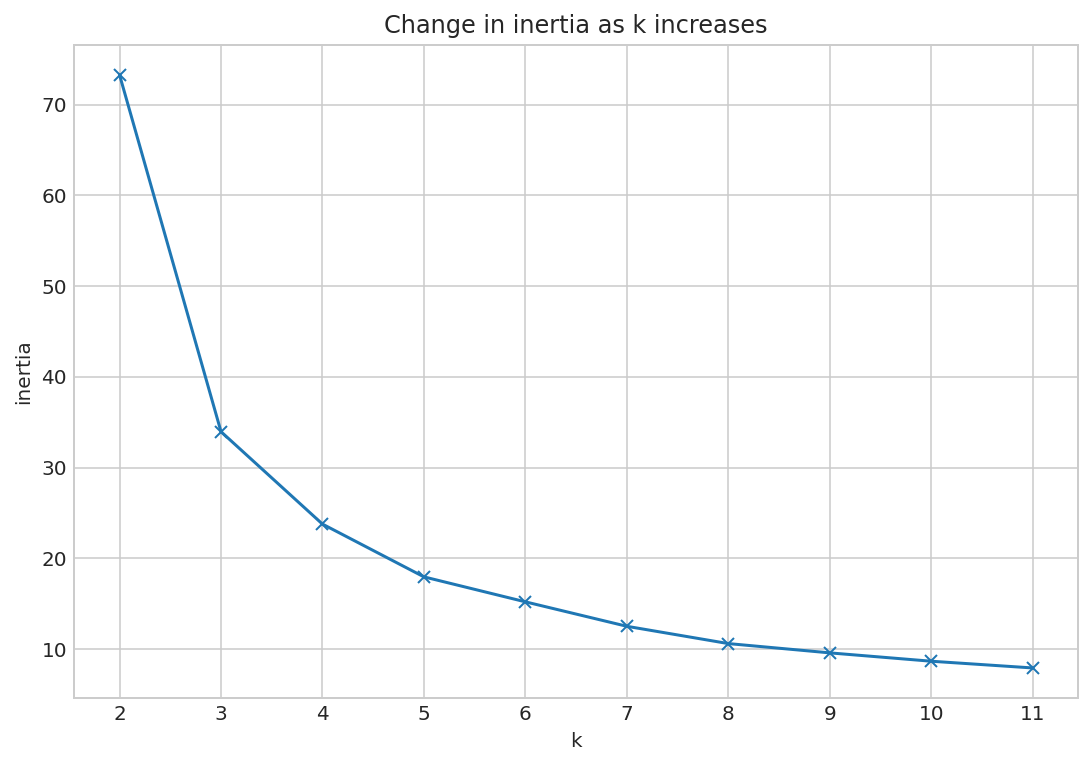

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

<div class="alert alert-warning">


### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the ```mall customers``` dataset. Be sure to visualize your results!

# Acquire & Prepare

In [16]:
mall_df = wm.wrangle_mall_data()

In [17]:
mall_df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
customer_id,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
age,19,21,20,23,31,22,35,23,64,30,...,34,32,33,38,47,35,45,32,32,30
annual_income,15,15,16,16,17,17,18,18,19,19,...,103,103,113,113,120,120,126,126,137,137
spending_score,39,81,6,77,40,76,6,94,3,72,...,23,69,8,91,16,79,28,74,18,83
gender_Female,0,0,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,1,0,0,0
gender_Male,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1


# Split

In [18]:
# Split
mall_train, mall_validate, mall_test = wm.split(mall_df, stratify=False, target=None)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (200, 6)

      Train: (120, 6) - 60.0%
   Validate: (40, 6) - 20.0%
       Test: (40, 6) - 20.0%


# Xy Split

In [19]:
# Xy_Split
feature_cols = ['gender_Male', 'age', 'annual_income']
target = ['spending_score']

mall_X_train, mall_y_train, mall_X_validate, mall_y_validate, mall_X_test, mall_y_test = wm.Xy_split(feature_cols, target, mall_train, mall_validate, mall_test)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:


   X_train: (120, 3)   Index(['gender_Male', 'age', 'annual_income'], dtype='object')
   y_train: (120, 1)     Index(['spending_score'])

X_validate: (40, 3)   Index(['gender_Male', 'age', 'annual_income'], dtype='object')
y_validate: (40, 1)     Index(['spending_score'])

    X_test: (40, 3)   Index(['gender_Male', 'age', 'annual_income'], dtype='object')
    y_test: (40, 1)     Index(['spending_score'])


# Clustering

In [20]:
# Create a new X subset with 3 features
mall_X_train = mall_train[feature_cols]

In [21]:
# Fit a KMeans model to my 3 feature dataset
mall_kmeans = KMeans(n_clusters = 4)

mall_kmeans.fit(mall_X_train)

mall_kmeans.predict(mall_X_train)

array([1, 3, 1, 1, 3, 1, 0, 2, 3, 1, 2, 3, 3, 0, 2, 3, 2, 0, 0, 0, 3, 1,
       3, 3, 0, 1, 3, 0, 2, 3, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1, 0, 0, 1, 3,
       3, 1, 1, 1, 1, 1, 3, 2, 0, 1, 3, 0, 3, 1, 0, 2, 1, 3, 2, 3, 1, 3,
       2, 1, 3, 2, 1, 2, 0, 0, 3, 2, 2, 3, 0, 2, 2, 0, 0, 1, 0, 0, 0, 3,
       3, 3, 1, 0, 1, 0, 0, 3, 1, 2, 0, 2, 3, 3, 3, 0, 3, 1, 1, 1, 1, 2,
       2, 3, 3, 3, 1, 3, 2, 3, 3, 3], dtype=int32)

In [22]:
# Store my predictions in the dataframe
mall_train['cluster'] = mall_kmeans.predict(mall_X_train)

# Visualize the results of your clustering.  

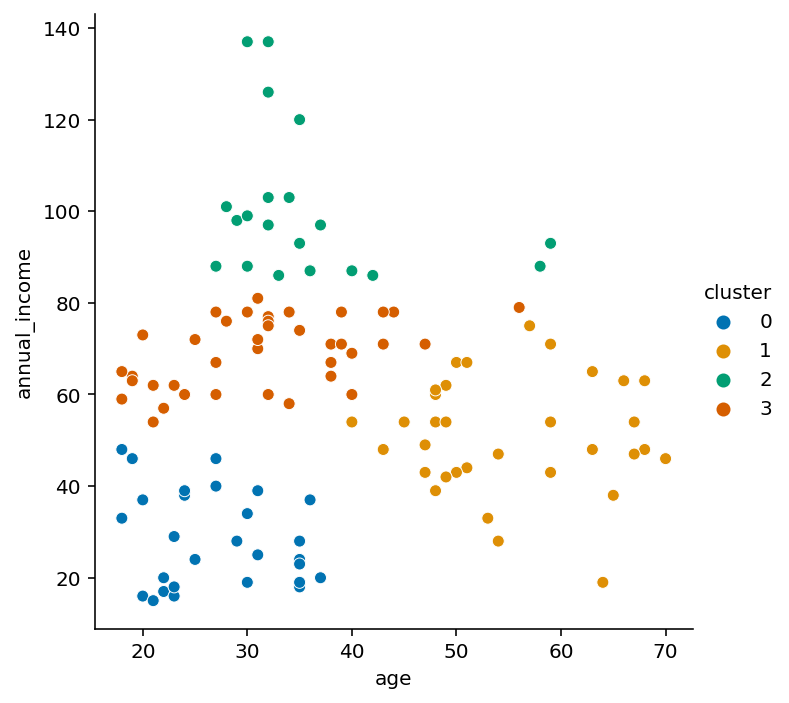

In [23]:
# Visualize results
sns.relplot(x = 'age', y = 'annual_income', hue = 'cluster',
            palette = 'colorblind', data = mall_train)

In [24]:
#Create a list of inertias for models fit to my 3 features
mall_inertia_list = []

for i in range(2, 8):
    mall_kmeans = KMeans(n_clusters=i)
    mall_kmeans.fit(mall_X_train)
    mall_inertia_list.append(mall_kmeans.inertia_)
    
mall_inertia_list    

[52562.9185520362,
 35785.31958128079,
 23090.3504784689,
 17842.72336134454,
 14329.30681818182,
 11687.472056277056]

# Use the elbow method to visually select a good value for k.  

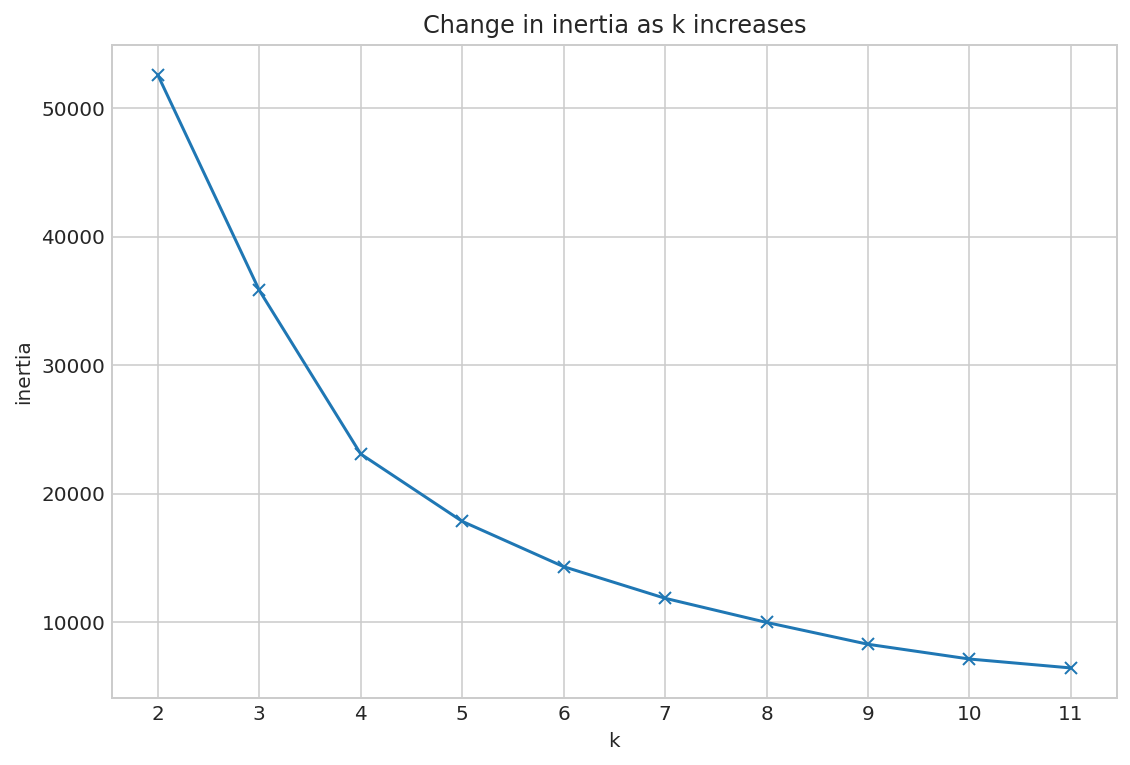

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(mall_X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

<div class="alert alert-warning">


### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [26]:
# Create a copy of my original dataframe to scale
mall_df_scaled = mall_train.copy()

In [27]:
#Create an instance of the scaler and fit/transform the same features I used before
mms = MinMaxScaler()

mall_df_scaled[['age', 'annual_income']] = mms.fit_transform(mall_df_scaled[['age', 'annual_income']])

mall_df_scaled.head()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male,cluster
0,102,0.596154,0.385246,48,1,0,1
1,114,0.019231,0.401639,46,0,1,3
2,86,0.576923,0.319672,46,0,1,1
3,67,0.480769,0.270492,50,1,0,1
4,88,0.076923,0.344262,55,1,0,3


In [28]:
# Subset these scaled features for training
mall_X_scaled = mall_df_scaled[['age', 'annual_income']]

In [29]:
#Fit a new model to my scaled data
mall_kmeans_scaled = KMeans(n_clusters=4)

mall_kmeans_scaled.fit(mall_X_scaled)

mall_kmeans_scaled.predict(mall_X_scaled)

array([2, 0, 2, 2, 0, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 3, 3, 3, 1, 2,
       1, 0, 3, 2, 1, 3, 1, 1, 2, 3, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 3, 2, 2, 3, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       1, 2, 0, 2, 2, 1, 0, 3, 1, 1, 1, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 2, 0, 2, 3, 3, 0, 2, 1, 3, 1, 0, 0, 1, 3, 0, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 1, 0], dtype=int32)

In [30]:
#Store the resuts in a new column
mall_df_scaled['cluster'] = mall_kmeans_scaled.predict(mall_X_scaled)

Text(0.5, 1.0, 'Clusters formed with scaled data.')

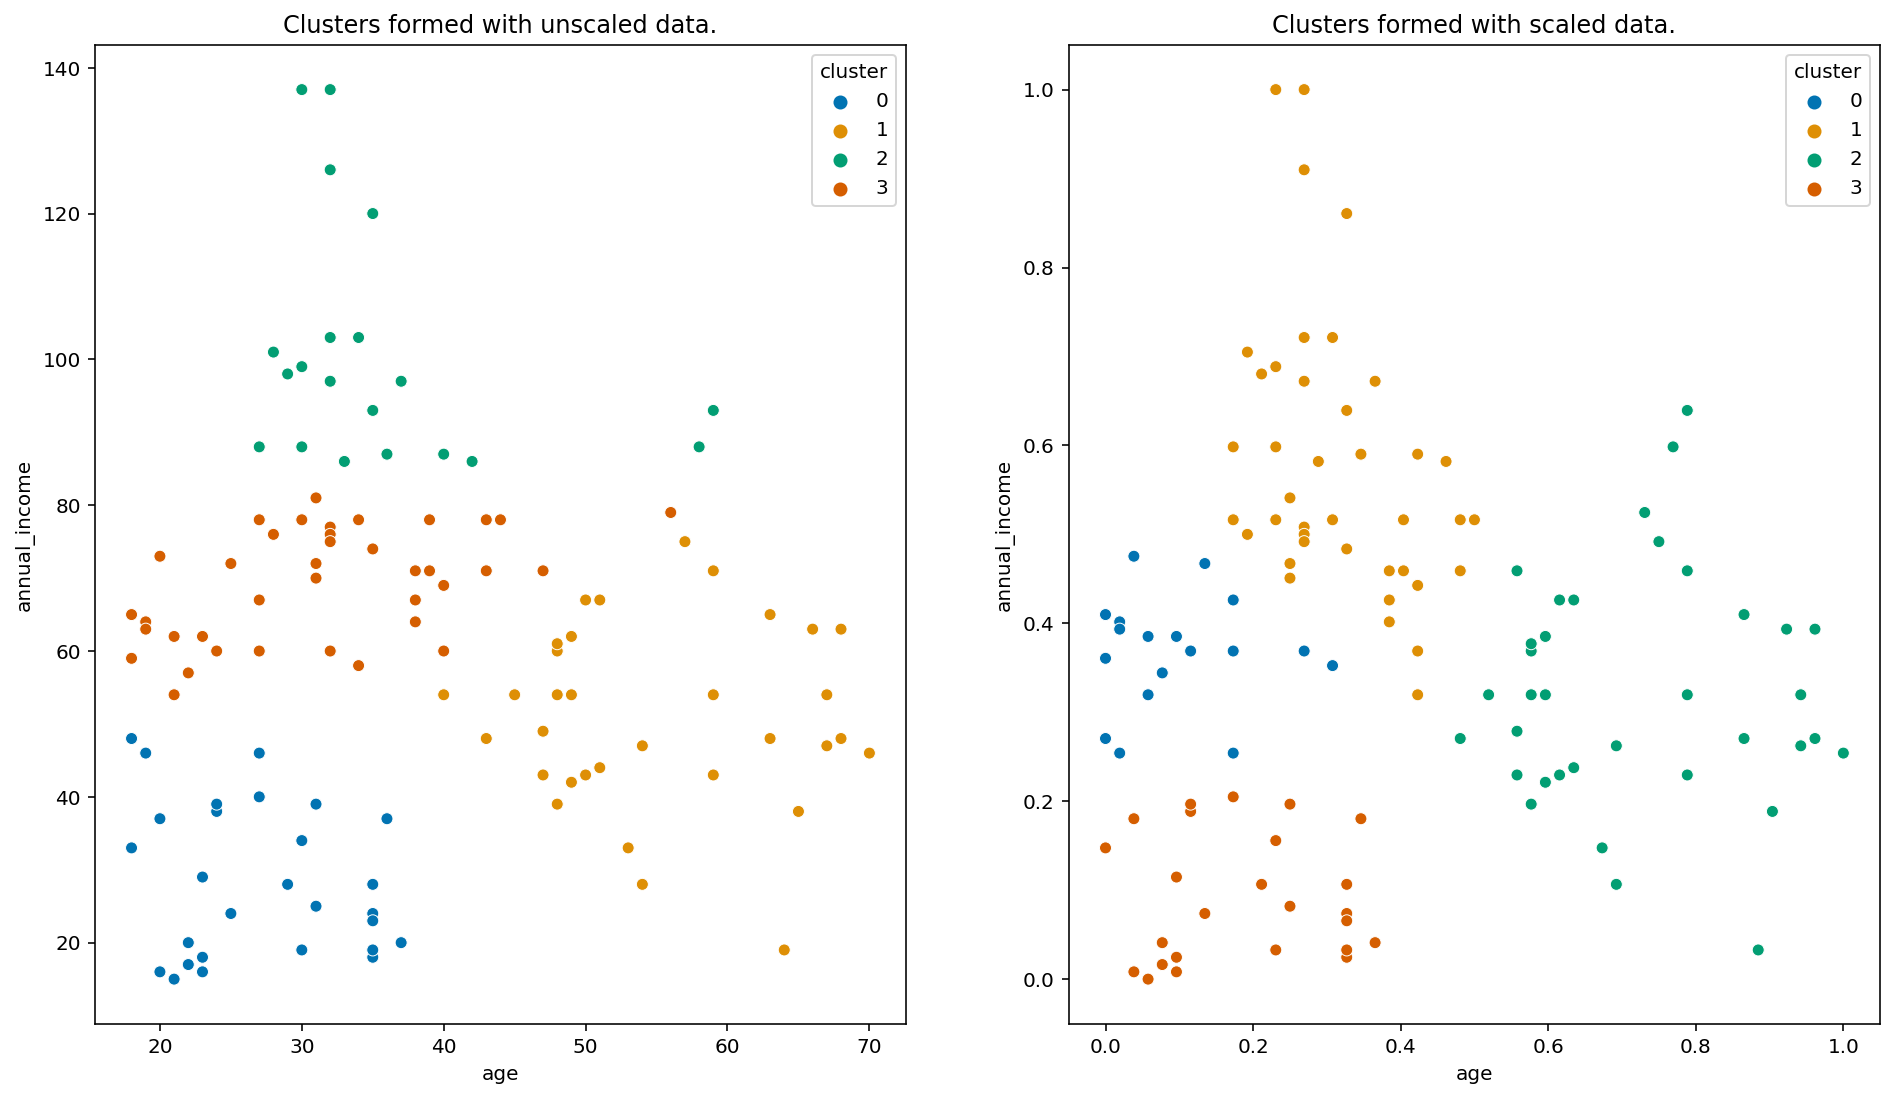

In [31]:
#Compare the clusters generated by scaled and unscaled data
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

sns.scatterplot(ax=axes[0], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_train)
axes[0].set_title('Clusters formed with unscaled data.')

sns.scatterplot(ax=axes[1], x='age', y='annual_income', hue='cluster',
                palette='colorblind', data=mall_df_scaled)
axes[1].set_title('Clusters formed with scaled data.')

# Observation:
* Almost identical due to low sample size
* scaled clusters are a little tighter with less outliers bleeding into other clusters

<div class="alert alert-danger">


# Bonus
a. Read in the data from this [google sheet](https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing)  
b. Visualize the data and guess the number and shape of the clusters.  
c. Implement the KMeans algorithm on unscaled data and visualize the clusters.  
d. Repeat the step above but with scaled data.  
e. Write down the takeaways from this exercise.  